<a href="https://colab.research.google.com/github/smudumala/coe_training/blob/master/Keras%20walkthrough%20with%20Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Walkthrough using Fashion MNIST
This walkthrough builds and tests some deep learning models using Tensorflow/Keras. For this, we will use the [Fashion MNIST](https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/) dataset, comprised of 28x28 pixel grayscale images of clothing in 10 categories: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.

Requirements: Python, Tensorflow (the GPU version, if your hardware supports it), numpy and matplotlib. The demo is constructed using Jupyter notebook, which allows us to run Python within separate cells and see the result, but the python commands here can also be put into a separate python file and run from the command line.

**Getting started:** The following import statements allow us to bring in the code libraries we are going to use so that we can reference them. Numpy provides mathematical functions for managing arrays of data. We also use matplotlib, which allows us to display images and graphs. Keras is a machine learning framework packaged within Tensorflow. We need some of the functions for creating neural network models and layers, as well as the Fashion MNIST dataset that can be loaded directly through Keras.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200  # make graphics appear larger

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Reshape

Let's start by loading the dataset and printing out an example of each category. Labels in the dataset are represented by numeric digits 0 through 9, so we create a list to look up the corresponding text labels.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


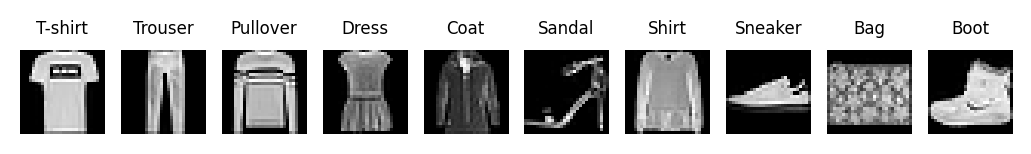

In [2]:
# load the data
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Boot']

# display one of each clothing category
for i in range(10):
    im = train_images[train_labels == i][0]
    plt.subplot(1,10,i+1)
    plt.imshow(im, 'gray')
    plt.axis('off')
    plt.title(class_names[i], size=6)

We will use the Sequential() model constructor to define a network that takes a single input and passes the information sequentially through a list of layers. The network will accept an image and output a predicted score for each of the 10 possible class labels.

Let's start out with a very simple model: a single fully-connected or "dense" layer. The *Dense()* layer learns a weighted connection between every input to every one of its outputs. We specify the number of outputs we want as the first parameter. We can specify an activation function to apply to the output of the layer. In this case, we use 'softmax' which normalizes the outputs to sum to 1, so that they are consistent with a probability distribution over the possible classes.

Since we are working with images that are 2D, we also to reshape the input before we pass it to the dense layer, which expects a vector. The *Flatten()* layer reshapes the input into a vector. For the first layer, we need to specify the size of the input.

In [3]:
print(np.max(train_images), np.min(train_images))

255 0


In [4]:
# define a simple network - really, this is one layer of neurons, since flatten just reshapes
model1 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

For fun, let's see how well the model does **before** we train it. We would expect it to do poorly, since the network weights are randomly assigned and unoptimized. The plot shows the probability assigned to the predicted label by the model and the label. In parentheses is the true label. The title is green if the model got it right.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


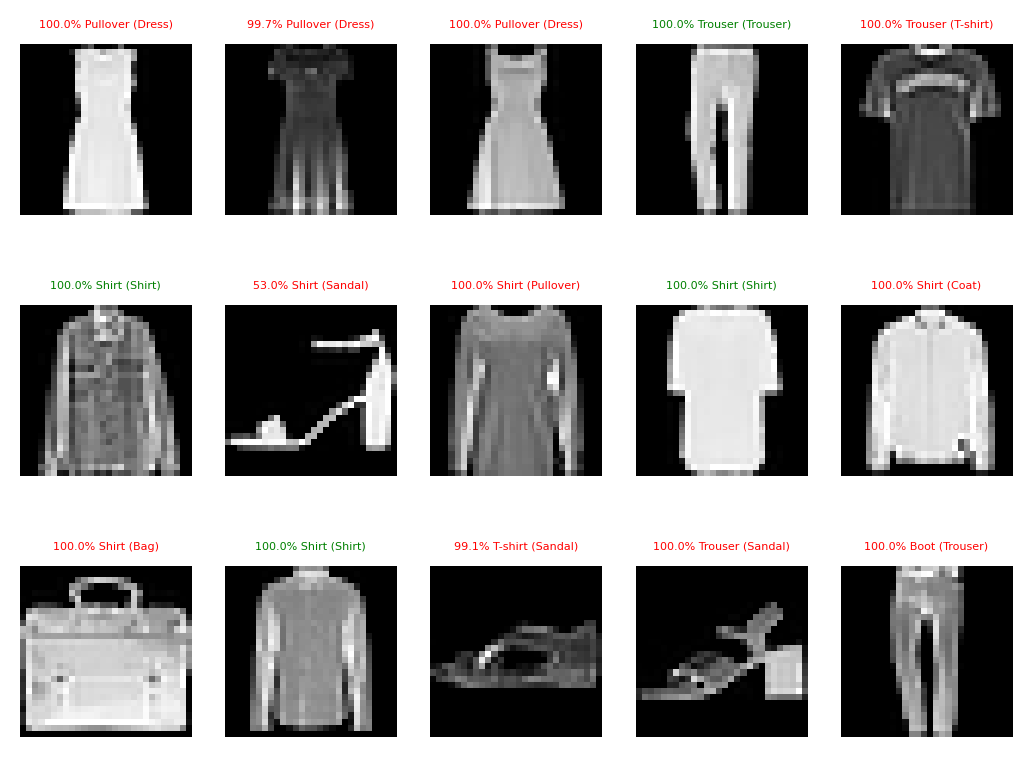

In [6]:
# plot a random sample of test images, their predicted labels and ground truth
def plot_results(model, images, labels, rows, cols):
    pred = model.predict(images)
    p = np.random.permutation(len(images))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[p[i]], 'gray')
        plt.axis('off')
        j = p[i]
        pred_label = np.argmax(pred[j])
        pred_prob = np.round(100*pred[j][pred_label],1)
        true_label = labels[j]
        pred_class = class_names[pred_label]
        true_class = class_names[true_label]
        color = "green" if pred_label == true_label else "red"
        plt.title(f"{pred_prob}% {pred_class} ({true_class})", size=4, color=color)
plot_results(model1, test_images, test_labels, 3, 5)

In Keras, we first "compile" the model and then we train it using the "fit" method. When we compile the model, we specify some options for how the model will be optimized and what metrics we want to evaluate. In our case, we will use the Adam optimizer and the sparse_categorical_crossentropy loss function. We will use accuracy as an evaluation metric when we test the model. Let's train for 20 epochs - each epoch is one pass through all of the training data.

In [7]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.fit(train_images, train_labels, epochs=20, verbose=2);

Epoch 1/20
1875/1875 - 3s - 2ms/step - accuracy: 0.7469 - loss: 16.6939
Epoch 2/20
1875/1875 - 5s - 2ms/step - accuracy: 0.7905 - loss: 11.6077
Epoch 3/20
1875/1875 - 3s - 1ms/step - accuracy: 0.7963 - loss: 11.4514
Epoch 4/20
1875/1875 - 5s - 3ms/step - accuracy: 0.7987 - loss: 11.0039
Epoch 5/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8017 - loss: 10.4406
Epoch 6/20
1875/1875 - 3s - 1ms/step - accuracy: 0.8046 - loss: 10.0697
Epoch 7/20
1875/1875 - 3s - 2ms/step - accuracy: 0.8041 - loss: 10.1867
Epoch 8/20
1875/1875 - 3s - 2ms/step - accuracy: 0.8060 - loss: 9.8860
Epoch 9/20
1875/1875 - 2s - 1ms/step - accuracy: 0.8073 - loss: 10.0151
Epoch 10/20
1875/1875 - 3s - 1ms/step - accuracy: 0.8076 - loss: 10.1128
Epoch 11/20
1875/1875 - 3s - 1ms/step - accuracy: 0.8084 - loss: 9.7237
Epoch 12/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8092 - loss: 9.5867
Epoch 13/20
1875/1875 - 4s - 2ms/step - accuracy: 0.8087 - loss: 10.0441
Epoch 14/20
1875/1875 - 3s - 1ms/step - accuracy: 0.8091 - loss

Not great. We only achieved about 81% accuracy on the training data. Let's evaluate on the test data and plot some results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7821 - loss: 12.0432
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


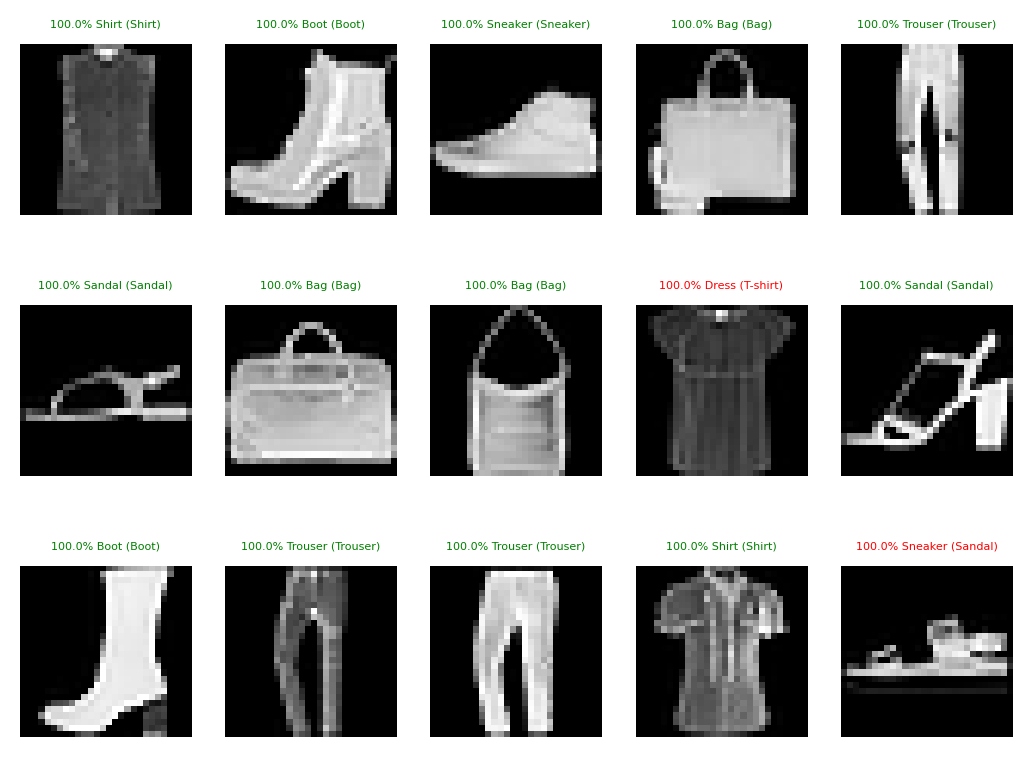

In [8]:
# evaluate accuracy on the test data
model1.evaluate(test_images, test_labels)

# plot a random sample of test images, their predicted labels and ground truth
plot_results(model1, test_images, test_labels, 3, 5)

We can do better. Let's try adding another dense layer to our network. For this layer, let's use the rectiffied linear (ReLU) activation function. The ReLU outputs 0 for negative values, but passes through any non-negative values.

In [9]:
# define network with two fully connected layers
model2 = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=20, verbose=2);

Train on 60000 samples
Epoch 1/20
60000/60000 - 5s - loss: 3.2893 - accuracy: 0.7248
Epoch 2/20
60000/60000 - 5s - loss: 0.5893 - accuracy: 0.7947
Epoch 3/20
60000/60000 - 5s - loss: 0.5515 - accuracy: 0.8058
Epoch 4/20
60000/60000 - 5s - loss: 0.5080 - accuracy: 0.8299
Epoch 5/20
60000/60000 - 5s - loss: 0.4922 - accuracy: 0.8366
Epoch 6/20
60000/60000 - 5s - loss: 0.4814 - accuracy: 0.8383
Epoch 7/20
60000/60000 - 5s - loss: 0.4668 - accuracy: 0.8436
Epoch 8/20
60000/60000 - 5s - loss: 0.4574 - accuracy: 0.8467
Epoch 9/20
60000/60000 - 5s - loss: 0.4501 - accuracy: 0.8491
Epoch 10/20
60000/60000 - 5s - loss: 0.4509 - accuracy: 0.8492
Epoch 11/20
60000/60000 - 5s - loss: 0.4442 - accuracy: 0.8499
Epoch 12/20
60000/60000 - 5s - loss: 0.4407 - accuracy: 0.8517
Epoch 13/20
60000/60000 - 5s - loss: 0.4404 - accuracy: 0.8519
Epoch 14/20
60000/60000 - 5s - loss: 0.4347 - accuracy: 0.8542
Epoch 15/20
60000/60000 - 5s - loss: 0.4364 - accuracy: 0.8501
Epoch 16/20
60000/60000 - 5s - loss: 0.43

We are up to 85% on the training set now. But we need a more powerful model to do even better. We will now add two new types of layers:

*Conv2D()* layers apply a learned set of filters (kernels) at each 2D spatial location. Each of these layers will return an output value for each kernel and each spatial location. The first parameter is the number of kernels. The second is the size of each kernel. The third is a stride by which to sub-sample the output. Setting padding to 'same' means that kernels will overlap the borders of the image so that the we retain the same spatial output shape.

*MaxPool2D()* layers compute the maximum input value within each 2D neighborhood. The first parameter is the size of the neighborhood to pool. The second is a stride by which to sub-sample the output. Here we downsample by 2.

Our convolutional network should do much better. It has the advantage that fewer parameters are needed for convolutional layers, and takes into account that images have spatial redundancy. Unlike our previous model, we don't want to flatten the input until we reach the Dense layers. Instead, we actually need to reshape our 28x28 images to 28x28x1 since Conv2D expects a dimension for color. We could do this outside the model, but in this case I used a *Reshape()* layer.

In [10]:
# define a convolutional network
model3 = Sequential([
    Reshape((28, 28, 1), input_shape=(28, 28)),
    Conv2D(32, 3, 1, padding='same', activation='relu'),
    Conv2D(32, 3, 1, padding='same', activation='relu'),
    MaxPool2D(2, 2),
    Conv2D(64, 3, 1, padding='same', activation='relu'),
    Conv2D(64, 3, 1, padding='same', activation='relu'),
    MaxPool2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 870,634 (3.32 MB)

 Trainable params: 870,634 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

This time, we will also tell Keras to use our test set for validation. This evaluates the accuracy metric on the test set at each epoch, but it only trains the model on the training set.

In [11]:
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model3.fit(train_images/255., train_labels, epochs=20, verbose=2, validation_data=(test_images/255., test_labels));

Epoch 1/20
1875/1875 - 13s - 7ms/step - accuracy: 0.8686 - loss: 0.3663 - val_accuracy: 0.8971 - val_loss: 0.2740
Epoch 2/20
1875/1875 - 16s - 8ms/step - accuracy: 0.9172 - loss: 0.2245 - val_accuracy: 0.9180 - val_loss: 0.2276
Epoch 3/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9322 - loss: 0.1804 - val_accuracy: 0.9224 - val_loss: 0.2144
Epoch 4/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9454 - loss: 0.1460 - val_accuracy: 0.9253 - val_loss: 0.2139
Epoch 5/20
1875/1875 - 7s - 4ms/step - accuracy: 0.9555 - loss: 0.1165 - val_accuracy: 0.9261 - val_loss: 0.2311
Epoch 6/20
1875/1875 - 6s - 3ms/step - accuracy: 0.9646 - loss: 0.0929 - val_accuracy: 0.9248 - val_loss: 0.2487
Epoch 7/20
1875/1875 - 11s - 6ms/step - accuracy: 0.9728 - loss: 0.0726 - val_accuracy: 0.9259 - val_loss: 0.2673
Epoch 8/20
1875/1875 - 10s - 6ms/step - accuracy: 0.9772 - loss: 0.0599 - val_accuracy: 0.9223 - val_loss: 0.3290
Epoch 9/20
1875/1875 - 10s - 5ms/step - accuracy: 0.9827 - loss: 0.0479 - val_accuracy: 0.92

Wow! 98% accuracy on the training set! But notice it only gets 91% accuracy on the test set. This indicates that there is some overfitting to the training set, but this is still pretty good for this dataset. With additional effort there are some tricks we could do to reduce overfitting, such as by augmenting the training dataset or adding *Dropout()* layers. But for now, let's just show the improvement in our predicted labels.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


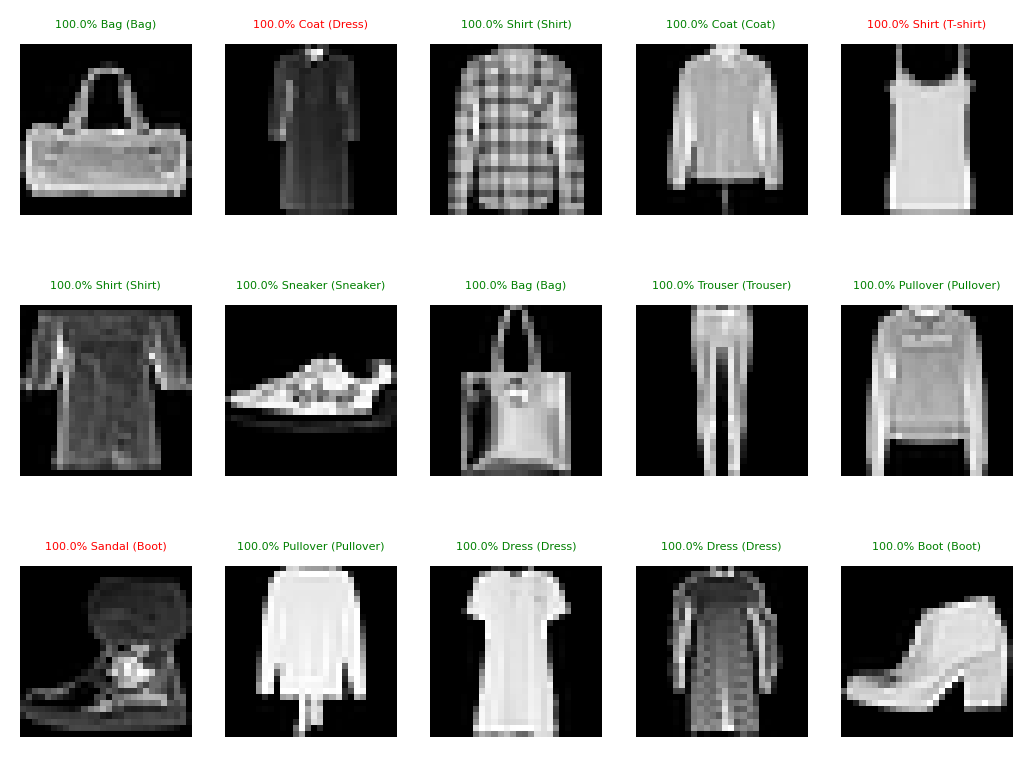

In [12]:
# plot a random sample of test images, their predicted labels and ground truth
plot_results(model3, train_images, train_labels, 3, 5)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


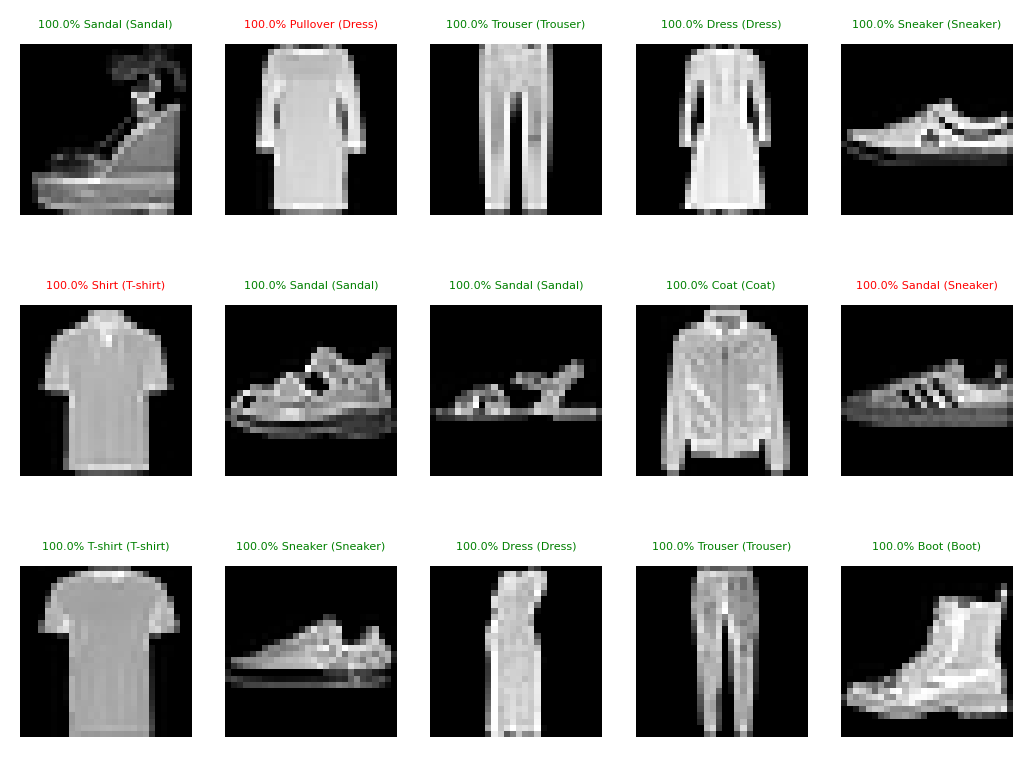

In [13]:
plot_results(model3, test_images, test_labels, 3, 5)